#Chaînes de Markov cachées et segmentation d’image 

Nom: DOUCOURE

Prénom: Dioula

##**Question 1** Forward

In [ ]:
import numpy as np
from tools import gauss



def forward(A, p, gauss):
    """
    Cette fonction calcule récursivement (mais ce n'est pas une fonction récursive!) les valeurs forward de la chaîne
    :param A: Matrice (2*2) de transition de la chaîne
    :param p: vecteur de taille 2 avec la probailité d'apparition a priori pour chaque classe
    :param gauss: matrice (longeur du signal * 2) qui correspond aux valeurs des deux densité gaussiennes pour chaque élément du signal bruité
    :return: une matrice de taille: (la longueur de la chaîne * nombre de classe), contenant tous les forward (de 1 à n)
    """
    T = gauss.shape[0]
    alpha = np.zeros((T, A.shape[0]))
    alpha[0] = p*gauss[0]
    for t in range (1,T):
        for i in range(A.shape[0]):
            for j in range(A.shape[0]):
                alpha[t, i] += alpha[t-1, j]*A[j, i]
            alpha[t, i] *= gauss[t, i]
        alpha[t] = alpha[t]/np.sum(alpha[t])
    return alpha

##**Question 2** Backward

In [ ]:
def backward(A, gauss):
    """
    Cette fonction calcule récursivement (mais ce n'est pas une fonction récursive!) les valeurs backward de la chaîne
    :param A: Matrice (2*2) de transition de la chaîne
    :param gauss: matrice (longeur du signal * 2) qui correspond aux valeurs des deux densités gaussiennes pour chaque élément du signal bruité
    :return: une matrice de taille: (la longueur de la chaîne * nombre de classe), contenant tous les backward (de 1 à n).
    Attention, si on calcule les backward en partant de la fin de la chaine, je conseille quand même d'ordonner le vecteur backward du début à la fin
    """
    T = gauss.shape[0]
    beta = np.zeros((T,A.shape[0]))
    beta[-1] = np.ones(A.shape[0])
    for t in range(T-2,-1,-1):
        for i in range(A.shape[0]):
            for j in range(A.shape[0]):
                beta[t, i] += beta[t+1, j]*A[i, j]*gauss[t+1, j]
        beta[t]= beta[t]/np.sum(beta[t])
    return beta

##**Question 3** Segmentattion du signal suivant le critère MPM

In [ ]:
def mpm_mc(signal_noisy, w, p, A, m1, sig1, m2, sig2):
    """
     Cette fonction permet d'appliquer la méthode mpm pour retrouver notre signal d'origine à partir de sa version bruité et des paramètres du model.
    :param signal_noisy: Signal bruité (numpy array 1D de float)
    :param w: vecteur dont la première composante est la valeur de la classe w1 et la deuxième est la valeur de la classe w2
    :param p: vecteur de taille 2 avec la probailité d'apparition a priori pour chaque classe
    :param A: Matrice (2*2) de transition de la chaîne
    :param m1: La moyenne de la première gaussienne
    :param sig1: L'écart type de la première gaussienne
    :param m2: La moyenne de la deuxième gaussienne
    :param sig2: L'écart type de la deuxième gaussienne
    :return: Un signal discret à 2 classe (numpy array 1D d'int), résultat de la segmentation par mpm du signal d'entrée
    """
    gausses = gauss(signal_noisy, m1, sig1, m2, sig2)
    alpha = forward(A, p, gausses)
    beta = backward(A, gausses)
    T=len(gausses)
    gamma = alpha*beta
    gamma = np.transpose(np.transpose(gamma)/np.sum(gamma, axis = 1))
    mpm_restore=np.array([np.argmax(gamma[t]) for t in range(T)])

    return mpm_restore



##**Question 4** Script markov_chain_segmentation.py

In [ ]:
import numpy as np
import matplotlib.pyplot as plt 
from tools import bruit_gauss, calc_erreur
from markov_chain import *


realisation = simu_mc(1000, np.array([0,1]), np.array([0.25,0.75]), np.array([[0.8,0.2],[0.07,0.93]]))
plt.plot(realisation, label="Signal")

rea_bruite = bruit_gauss(realisation,np.array([0,1]),0, 1,3,2)
plt.plot(rea_bruite, label="Signal bruité")

rea_segmente = mpm_mc(rea_bruite, np.array([0,1]),  np.array([0.25,0.75]), np.array([[0.8,0.2],[0.07,0.93]]), 0, 1, 3, 2)
plt.plot(rea_segmente, label="Signal segmenté")

taux_erreur = calc_erreur(realisation, rea_segmente)
print('le taux d\'erreur vaut')
print(taux_erreur)

Nous trouvons un taux d'erreur de **6.3 %**

##**Question 5** Script des trois signaux de taille N générées

In [ ]:
import numpy as np
import matplotlib.pyplot as plt 
from tools import bruit_gauss, calc_erreur
from markov_chain import *


N = 1000
w = np.array([0,1])
p = np.array([0.25, 0.75])

m1_1 = 0
m2_1 = 3
sig1_1 = 1
sig2_1 = 2

m1_2 = 1
m2_2 = 1
sig1_2 = 1
sig2_2 = 5

m1_3 = 0
m2_3 = 1
sig1_3 = 1 
sig2_3 = 1

A_1 = np.array([[0.3, 0.7],[0.07, 0.93]])
A_2 = np.array([[0.9, 0.1],[0.5, 0.5]])
A_3 = np.array([[0.01, 0.99],[0.8, 0.2]])

signal_1 = simu_mc(N, w, p, A_1)
signal_2 = simu_mc(N, w, p, A_2)
signal_3 = simu_mc(N, w, p, A_3)

bruite_1_sig1 = bruit_gauss(signal_1, w, m1_1, sig1_1, m2_1, sig2_1)
bruite_2_sig1 = bruit_gauss(signal_1, w, m1_2, sig1_2, m2_2, sig2_2)
bruite_3_sig1 = bruit_gauss(signal_1, w, m1_3, sig1_3, m2_3, sig2_3)

segmente_1_sig1 = mpm_mc(bruite_1_sig1, w, p, A_1, m1_1, sig1_1, m2_1, sig2_1)
segmente_2_sig1 = mpm_mc(bruite_2_sig1, w, p, A_1, m1_2, sig1_2, m2_2, sig2_2)
segmente_3_sig1 = mpm_mc(bruite_3_sig1, w, p, A_1, m1_3, sig1_3, m2_3, sig2_3)

erreur_1_sig1 = calc_erreur(signal_1, segmente_1_sig1)
erreur_2_sig1 = calc_erreur(signal_1, segmente_2_sig1)
erreur_3_sig1 = calc_erreur(signal_1, segmente_3_sig1)

print('taux d\'erreur signal 1 segmentation 1')
print(erreur_1_sig1)
print('')
print('taux d\'erreur signal 1 segmentation 2')
print(erreur_2_sig1)
print('')
print('taux d\'erreur signal 1 segmentation 3')
print(erreur_3_sig1)

bruite_1_sig2 = bruit_gauss(signal_2, w, m1_1, sig1_1, m2_1, sig2_1)
bruite_2_sig2 = bruit_gauss(signal_2, w, m1_2, sig1_2, m2_2, sig2_2)
bruite_3_sig2 = bruit_gauss(signal_2, w, m1_3, sig1_3, m2_3, sig2_3)

segmente_1_sig2 = mpm_mc(bruite_1_sig2, w, p, A_2, m1_1, sig1_1, m2_1, sig2_1)
segmente_2_sig2 = mpm_mc(bruite_2_sig2, w, p, A_2, m1_2, sig1_2, m2_2, sig2_2)
segmente_3_sig2 = mpm_mc(bruite_3_sig2, w, p, A_2, m1_3, sig1_3, m2_3, sig2_3)

erreur_1_sig2 = calc_erreur(signal_2, segmente_1_sig2)
erreur_2_sig2 = calc_erreur(signal_2, segmente_2_sig2)
erreur_3_sig2 = calc_erreur(signal_2, segmente_3_sig2)

print('taux d\'erreur signal 2 segmentation 1')
print(erreur_1_sig2)
print('')
print('taux d\'erreur signal 2 segmentation 2')
print(erreur_2_sig2)
print('')
print('taux d\'erreur signal 2 segmentation 3')
print(erreur_3_sig2)


bruite_1_sig3 = bruit_gauss(signal_3, w, m1_1, sig1_1, m2_1, sig2_1)
bruite_2_sig3 = bruit_gauss(signal_3, w, m1_2, sig1_2, m2_2, sig2_2)
bruite_3_sig3 = bruit_gauss(signal_3, w, m1_3, sig1_3, m2_3, sig2_3)

segmente_1_sig3 = mpm_mc(bruite_1_sig3, w, p, A_3, m1_1, sig1_1, m2_1, sig2_1)
segmente_2_sig3 = mpm_mc(bruite_2_sig3, w, p, A_3, m1_2, sig1_2, m2_2, sig2_2)
segmente_3_sig3 = mpm_mc(bruite_3_sig3, w, p, A_3, m1_3, sig1_3, m2_3, sig2_3)

erreur_1_sig3 = calc_erreur(signal_3, segmente_1_sig3)
erreur_2_sig3 = calc_erreur(signal_3, segmente_2_sig3)
erreur_3_sig3 = calc_erreur(signal_3, segmente_3_sig3)

print('taux d\'erreur signal 3 segmentation 1')
print(erreur_1_sig3)
print('')
print('taux d\'erreur signal 3 segmentation 2')
print(erreur_2_sig3)
print('')
print('taux d\'erreur signal 3 segmentation 3')
print(erreur_3_sig3)


##Résultats obtenus:

\begin{array}{|l|l|l|l|}
\hline
 &Signal_1& Signal_2 & Signal_3 \\
\hline Bruit_1  &  ~  ~9.6\% &  ~ ~ ~6.7\% &  ~ ~ ~6.5\% \\
\hline
Bruit_2 &  ~ ~ ~8.4\% &  ~ ~ ~7.3\% &  ~ ~ ~6.8\% \\
\hline
Bruit_3 &  ~ ~ ~8.8\% &  ~ ~ ~15.3\% &  ~ ~ ~17.5\% \\
\hline
\end{array}

Nous avons utilisé les matrices de transition suivantes: \\
$ A_1 = \begin{bmatrix}
0.3 & 0.7 \\
0.07 & 0.93
\end{bmatrix} $,  $\quad$  $ A_2 = \begin{bmatrix}
0.9 & 0.1 \\
0.5 & 0.5
\end{bmatrix} $,    $\quad$  $ A_3 = \begin{bmatrix}
0.01 & 0.99 \\
0.8 & 0.2
\end{bmatrix} $






*   Nous remarquons que plus le bruit est important plus le taux d'erreur augmente 
*   Par ailleurs, on peut aussi mettre en évidence l'influence des matrices de transitions sur notre modèle. En effet, lorsqu'on a de grandes probabilités de rester dans le même état, la prédiction de l'état d'après sera plus facile ce qui ne nous fournit des taux d'erreur assez faibles comme on le voit avec nos résultats.



##Résultats graphiques

In [ ]:
from IPython.display import Image

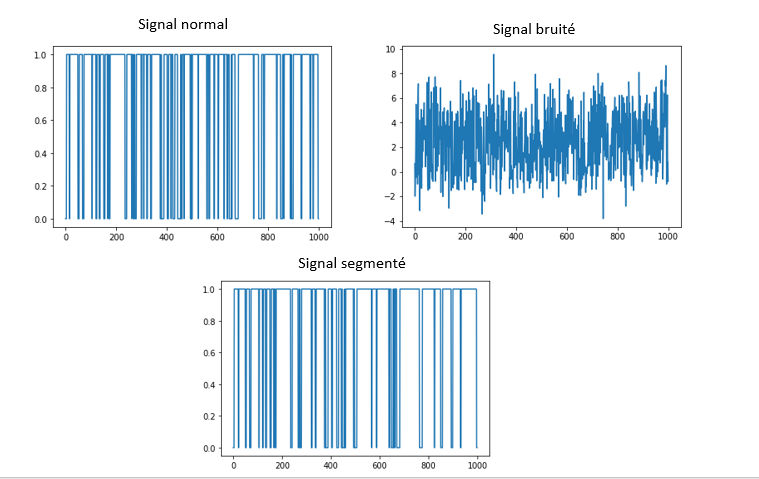

In [ ]:
Image('Capture.PNG', width=800 )

##**Question 6**  Remplir la fonction calc_probaprio_mc(signal, w) 

In [ ]:
def calc_probaprio_mc(signal, w):
    """
    Cete fonction permet de calculer les probabilité a priori des classes w1 et w2 et les transitions a priori d'une classe à l'autre,
    en observant notre signal non bruité
    :param signal: Signal discret non bruité à deux classes (numpy array 1D d'int)
    :param w: vecteur dont la première composante est la valeur de la classe w1 et la deuxième est la valeur de la classe w2
    :return: un vecteur de taille 2 avec la probailité d'apparition a priori pour chaque classe et une une matrice de taille (2*2), matrice de transition de la chaîne
    """
    T = len(signal)
    #proba d'apparition
    proba = np.array([len(signal[signal == w[0]]),len(signal[signal == w[1]])])/T
    #initialiser notre matrice de transition
    
    A = np.zeros((len(w),len(w)))
    w_0, w_1 = 0,0
    if signal[0] == 0:
        prev = 0
    else :
        prev = 1
    for i in range(1,T):
        w_0 += 1*(prev == 0)
        w_1 += 1*(prev == 1)
        if signal[i] == 0:
            next = 0
        else :
            next = 1
        A[prev][next] += 1
        prev = next
    A = np.array(A[0]/w_0,A[1]/w_1)
    
    return(proba, A)

##**Question 7** 

In [ ]:
import numpy as np
import matplotlib as plt
from tools import bruit_gauss, calc_erreur
from gaussian_mixture import *
from markov_chain import *

A = np.array([[0.8,0.2],[0.07,0.93]])
N = 1000
w = np.array([0,1])
p = np.array([0.25, 0.75])

m1_1 = 0
m2_1 = 3
sig1_1 = 1
sig2_1 = 2

m1_2 = 1
m2_2 = 1
sig1_2 = 1
sig2_2 = 5

m1_3 = 0
m2_3 = 1
sig1_3 = 1 
sig2_3 = 1

#générer signal modele indépendant
signal = simu_gm(N, w, p)
#signal bruité
noise1_sig1 = bruit_gauss(signal, w, m1_1, sig1_1, m2_1, sig2_1)
noise2_sig1 = bruit_gauss(signal, w, m1_2, sig1_2, m2_2, sig2_2)
noise3_sig1 = bruit_gauss(signal, w, m1_3, sig1_3, m2_3, sig2_3)

print('Pour le signal initial généré par le modèle (X, Y) indépendants')
#Parémètres chaine de markov
param_markov = calc_probaprio_mc(signal, w)
print('paramères chaine de markov')
print(param_markov)
#Restauration du signal du modèle indépendant
 
restore_noise1_gm = mpm_gm(noise1_sig1, w, p, m1_1, sig1_1, m2_1, sig2_1)
restore_noise2_gm = mpm_gm(noise2_sig1, w, p, m1_2, sig1_2, m2_2, sig2_2)
restore_noise3_gm = mpm_gm(noise3_sig1, w, p, m1_3, sig1_3, m2_3, sig2_3)

restore_noise1_markov = mpm_mc(noise1_sig1, w, p, A, m1_1, sig1_1, m2_1, sig2_1)
restore_noise2_markov = mpm_mc(noise2_sig1, w, p, A, m1_2, sig1_2, m2_2, sig2_2)
restore_noise3_markov = mpm_mc(noise3_sig1, w, p, A, m1_3, sig1_3, m2_3, sig2_3)

#Erreur 
error_noise1_gm = calc_erreur(signal, restore_noise1_gm)
error_noise1_mc = calc_erreur(signal, restore_noise1_markov)

print('taux d\'erreur signal (X,Y) indép mpm modèle indépendant bruit 1')
print(error_noise1_gm)
print('')
print('taux d\'erreur signal (X,Y) indép mpm modèle markov bruit 1')
print(error_noise1_mc)

#Erreur 
error_noise2_gm = calc_erreur(signal, restore_noise2_gm)
error_noise2_mc = calc_erreur(signal, restore_noise2_markov)

print('taux d\'erreur signal (X,Y) indép mpm modèle indépendant bruit 2')
print(error_noise2_gm)
print('')
print('taux d\'erreur signal (X,Y) indép mpm modèle markov bruit 2')
print(error_noise2_mc)

#Erreur 
error_noise3_gm = calc_erreur(signal, restore_noise3_gm)
error_noise3_mc = calc_erreur(signal, restore_noise3_markov)

print('taux d\'erreur signal (X,Y) indép mpm modèle indépendant bruit 3')
print(error_noise3_gm)
print('')
print('taux d\'erreur signal (X,Y) indép mpm modèle markov bruit 3')
print(error_noise3_mc)


#Générons un modèle par une chaine de Markov

signal_2 = simu_mc(N, w, p, A)

noise1_sig2 = bruit_gauss(signal_2, w, m1_1, sig1_1, m2_1, sig2_1)
noise2_sig2 = bruit_gauss(signal_2, w, m1_2, sig1_2, m2_2, sig2_2)
noise3_sig2 = bruit_gauss(signal_2, w, m1_3, sig1_3, m2_3, sig2_3)

#Parémètres modèle indépendant
print('Pour le signal généré par Markov)')

param_indep = calc_probaprio_mc(signal_2, w)
print('paramères modèle indépendant')
print(param_indep)
#Restaurons le signal

restorenoise1_gm = mpm_gm(noise1_sig2, w, p, m1_1, sig1_1, m2_1, sig2_1)
restorenoise2_gm = mpm_gm(noise2_sig2, w, p, m1_2, sig1_2, m2_2, sig2_2)
restorenoise3_gm = mpm_gm(noise3_sig2, w, p, m1_3, sig1_3, m2_3, sig2_3)

restorenoise1_markov = mpm_mc(noise1_sig2, w, p, A, m1_1, sig1_1, m2_1, sig2_1)
restorenoise2_markov = mpm_mc(noise2_sig2, w, p, A, m1_2, sig1_2, m2_2, sig2_2)
restorenoise3_markov = mpm_mc(noise3_sig2, w, p, A, m1_3, sig1_3, m2_3, sig2_3)


#Erreur 
errornoise1_gm = calc_erreur(signal_2, restorenoise1_gm)
errornoise1_mc = calc_erreur(signal_2, restorenoise1_markov)

print('taux d\'erreur signal markov mpm: modèle indépendant bruit 1')
print(errornoise1_gm)
print('')
print('taux d\'erreur signal markov mpm: modèle markov bruit 1')
print(errornoise1_mc)

#Erreur 
errornoise2_gm = calc_erreur(signal_2, restorenoise2_gm)
errornoise2_mc = calc_erreur(signal_2, restorenoise2_markov)

print('taux d\'erreur signal markov mpm: modèle indépendant bruit 2')
print(errornoise2_gm)
print('')
print('taux d\'erreur signal markov mpm: modèle markov bruit 2')
print(errornoise2_mc)

#Erreur 
errornoise3_gm = calc_erreur(signal_2, restorenoise3_gm)
errornoise3_mc = calc_erreur(signal_2, restorenoise3_markov)

print('taux d\'erreur signal markov mpm: modèle indépendant bruit 3')
print(errornoise3_gm)
print('')
print('taux d\'erreur signal markov mpm: modèle markov bruit 3')
print(errornoise3_mc)

##Résultats obtenus:


\begin{array}{|l|l|l|l|}
\hline
Signal~généré~par &Segmentation~gm ~& Segmentation~mc \\
\hline Modèle~(X_i,Y_i)/ ~bruit_1 &  ~ ~ ~ \quad ~  ~ ~ ~14.7\% &  \quad ~ ~ ~~ ~ ~20.4\% 
\\
\hline Modèle~(X_i,Y_i)/ ~bruit_2 &  ~ ~ ~ \quad ~  ~ ~ ~21.3\% &  \quad ~ ~ ~~ ~ ~23.1\% 
\\
\hline Modèle~(X_i,Y_i)/ ~bruit_3 &  ~ ~ ~ \quad ~  ~ ~ ~20.9\% &  \quad ~ ~ ~~ ~ ~25\% 
\\
\hline
Chaîne ~de ~Markov/~bruit_1 & \quad \quad  ~ ~ ~  15.4\% & \quad ~ ~ ~ ~ ~ ~ 6.6\% \\
\hline
Chaîne ~de ~Markov/bruit_2 & \quad \quad  ~ ~ ~  19.4\% & \quad ~ ~ ~ ~ ~ ~ 6.1\% \\
\hline
Chaîne ~de ~Markov/bruit_3 & \quad \quad  ~ ~ ~  26.7\% & \quad ~ ~ ~ ~ ~ ~ 17.7\% \\
\hline
\end{array}




Pour le signal initial généré par le modele $(X_i, Y_i)$ indépendants, les paramètres de la chaîne de markov renvoyés par le fonction $\textit{cal_probaprio_mc}$ sont les suivants: $p=[0.238, 0.762]$ et  $ A = \begin{pmatrix}
0.22268908 & 0.77731092 \\
0.24310118 &  0.75689882
\end{pmatrix}$


Pour le signal initial généré par modèle de la chaîne de markov, les paramètres  du modèle indépendant renvoyés par le fonction $\textit{cal_probaprio_gm}$ sont les suivants: $p=[0.315, 0.685]$ et  $ A = \begin{pmatrix}
0.85079365 & 0.14920635 \\
0.06871345 &  0.93128655
\end{pmatrix}$

Nous observons que lorsque le signal est généré par le modèle $(X_i,Y_i)$ indépendant, les taux d'erreur sont plus faibles lorsqu'on le restaure par le  modèle MPM indépendant que par celui suivant la chaîne de markov. De même, si le signal initial est généré par une chaîne de markov, on observe des taux d'erreur plus grands lorsqu'on utilise le modèle MPM indépendant. Avec le modèle suivant la chaîne de markov, ces taux d'erreur sont beaucoup faibles.

Les meilleurs taux d'erreur sont ceux obtenus avec un signal généré par une chaîne de markov et dont les signaux bruités correspondant sont restaurés par MPM suivant la chaîne de markov

#Application à la segmentation d'images

##**Question 1** Remplir la fonction calc_param_EM_mc

In [ ]:
def calc_param_EM_mc(signal_noisy, p, A, m1, sig1, m2, sig2):
    """
    Cette fonction permet de calculer les nouveaux paramètres estimé pour une itération de EM
    :param signal_noisy: Signal bruité (numpy array 1D de float)
    :param p: vecteur de taille 2 avec la probailité d'apparition a priori pour chaque classe
    :param A: Matrice (2*2) de transition de la chaîne
    :param m1: La moyenne de la première gaussienne
    :param sig1: L'écart type de la première gaussienne
    :param m2: La moyenne de la deuxième gaussienne
    :param sig2: L'écart type de la deuxième gaussienne
    :return: tous les paramètres réestimés donc p, A, m1, sig1, m2, sig2
    """
    gausses = gauss(signal_noisy, m1, sig1, m2, sig2)
    alpha = forward(A, p, gausses)
    beta = backward(A, gausses)
    
    # A compléter
    n = len(signal_noisy)  
    pij_n = np.zeros((n,2,2))
    for t in range(n-1):
        for i in range(2):
            for j in range(2):
                pij_n[t][i][j] = alpha[t][i]*A[i][j]*gausses[t+1][j]*beta[t+1][j]
        pij_n[t] = pij_n[t]/np.sum(pij_n[t])
        
   # lorsque t=n-1     
    for i in range(2):
        for j in range(2):
            pij_n[n-1] = alpha[n-1][i]*A[i][j]
            pij_n[t] = pij_n[t]/np.sum(pij_n[t])
    pij_n[n-1] = pij_n[n-1]/np.sum(pij_n[n-1])
    
    A_k_plus_1 =np.array([[ np.sum(pij_n[:-1][:,i,j]) for j in range(2)] for i in range(2)]) /(n-1)
    
    for i in range(2):
        A_k_plus_1[i]/=np.sum(A_k_plus_1[i])
        
    #calcul des moyennes
    pi_n0= np.array([np.sum(pij_n[i][0]) for i in range(n)])
    m1_k_plus_1 = np.sum(signal_noisy*pi_n0)/np.sum(pi_n0)
    pi_n1= np.array([np.sum(pij_n[i][1]) for i in range(n)])
    m2_k_plus_1 = np.sum(signal_noisy*pi_n1)/np.sum(pi_n1)
    
    #calcul des sigmas
    sig1_k_plus_1 = np.sum(((signal_noisy - m1_k_plus_1)**2)*pi_n0)/np.sum(pi_n0)
    sig2_k_plus_1 = np.sum(((signal_noisy - m2_k_plus_1)**2)*pi_n1)/np.sum(pi_n1)
    
    #calcul des p_i
    p_k_plus_1=np.dot(p,A_k_plus_1)
    p_k_plus_1/=np.sum(p_k_plus_1)
    
    return p_k_plus_1,A_k_plus_1,m1_k_plus_1,sig1_k_plus_1,m2_k_plus_1,sig2_k_plus_1


##**Question 2** 

In [ ]:
import numpy as np
import cv2 as cv
from tools import bruit_gauss,calc_erreur, peano_transform_img, transform_peano_in_img, line_transform_img, transform_line_in_img
from gaussian_mixture import *
from markov_chain import *
import matplotlib.pyplot as plt

#Etant donné le nombre important de bruit à calculer pour chaque image,
#nous allons utiliser des boucles en parcourant des listes contenant nos paramètres

image = cv.imread('images/zebre2.bmp', 0)
w = np.array([0,1])
signal = peano_transform_img(image)/255
A, pi = calc_probaprio_mc(signal, w)
p_init=np.array([0.25,0.75])
A_init=np.array([[0.8,0.2],[0.07,0.93]])
m1_init = 0.4
m2_init = 2.8
sig1_init = 1.3
sig2_init = 2.7
iter = 5
segmentation_error = {"gm" : [], "mc" : []}
parameters=[[0,3,1,2],[1,1,1,5],[0,1,1,1]]
for m1,m2,sig1,sig2 in parameters:
    #On bruite le signal
    signal_noisy = bruit_gauss(signal,w,m1,sig1,m2,sig2)
    
    #On estime les paramètres grâce à l'algorithme EM selon le modèle MC
    p_est, A_est, m1_est, sig1_est, m2_est, sig2_est = estim_param_EM_mc(iter, signal_noisy, p_init, A_init, m1_init, sig1_init, m2_init, sig2_init)
    #On segmente le signal selon le modèle MC
    signal_seg_mc = mpm_mc(signal_noisy,w,p_est,A_est,m1_est,sig1_est,m2_est,sig2_est)
    #On transforme le signal segmenté en image
    img_seg_mc = transform_peano_in_img(signal_seg_mc, image.shape[0])
    #On calcule l'erreur de segmentation
    segmentation_error["mc"].append(calc_erreur(signal, signal_seg_mc))
    
    #On estime les paramètres grâce à l'algorithme EM selon le modèle GM
    p_est_gm, m1_est_gm, sig1_est_gm, m2_est_gm, sig2_est_gm = estim_param_EM_gm(iter, signal_noisy, p_init, m1_init, sig1_init, m2_init, sig2_init)
    #On segmente le signal selon le modèle GM
    signal_seg_gm =mpm_gm(signal_noisy,w,p_est_gm,m1_est_gm,sig1_est_gm,m2_est_gm,sig2_est_gm)
    #On transforme le signal segmenté en image
    img_seg_gm = transform_peano_in_img(signal_seg_gm, image.shape[0])
    #On calcule l'erreur de segmentation
    segmentation_error["gm"].append(calc_erreur(signal, signal_seg_gm))
    
    f = plt.figure()
    f.add_subplot(1,2, 1)
    plt.imshow(img_seg_mc)
    f.add_subplot(1,2, 2)
    plt.imshow(img_seg_gm)
    plt.show(block=True)
   

###Résultats


\begin{array}{|l|l|l|l|}
\hline
Image &Segmentation~gm ~& Segmentation~mc \\
\hline zebre2/ ~bruit_1 &  ~ ~ ~ \quad ~  ~ ~ ~15.2\% &  \quad ~ ~ ~~ ~ ~43.3\% 
\\
\hline zebre2/ ~bruit_2 &  ~ ~ ~ \quad ~  ~ ~ ~15.8\% &  \quad ~ ~ ~~ ~ ~43.3\% 
\\
\hline zebre2/ ~bruit_3 &  ~ ~ ~ \quad ~  ~ ~ ~56.7\% &  \quad ~ ~ ~~ ~ ~43.3\% 
\\
\hline
promenade2/~bruit_1 & \quad \quad  ~ ~ ~  16.2\% & \quad ~ ~ ~ ~ ~ ~ 62.5\% \\
\hline
promenade2/bruit_2 & \quad \quad  ~ ~ ~  19.7\% & \quad ~ ~ ~ ~ ~ ~ 62.5\% \\
\hline
promenade2/bruit_3 & \quad \quad  ~ ~ ~  32.1\% & \quad ~ ~ ~ ~ ~ ~ 62.5\% \\
\hline
beee2/~bruit_1 & \quad \quad  ~ ~ ~  13.5\% & \quad ~ ~ ~ ~ ~ ~ 1.2\% \\
\hline
beee2/bruit_2 & \quad \quad  ~ ~ ~  12.1\% & \quad ~ ~ ~ ~ ~ ~ 29.1\% \\
\hline
beee2/bruit_3 & \quad \quad  ~ ~ ~  49.7\% & \quad ~ ~ ~ ~ ~ ~ 29.1\% \\
\hline
\end{array}

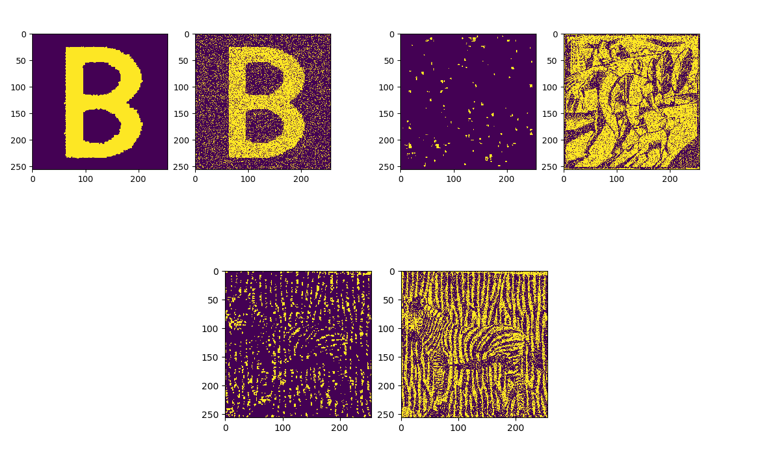

In [ ]:
from IPython.display import Image
Image('Capture_1.PNG', width=800)

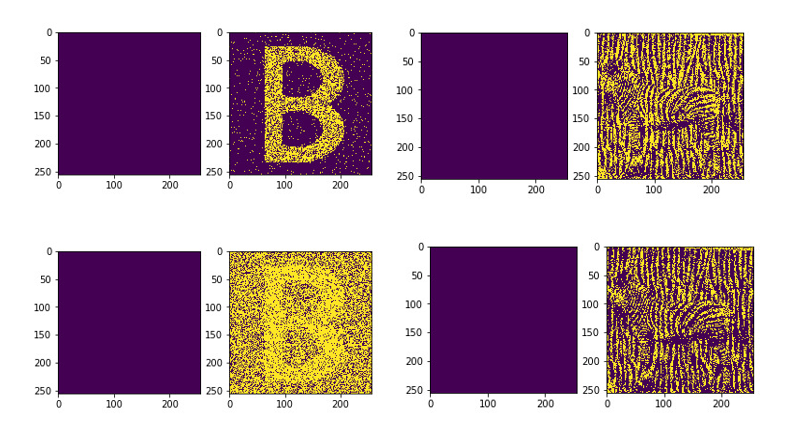

In [ ]:
Image('Capture_3.PNG', width=550)